<a id=top></a>


## Exploratory Data Analysis of the COVID-19 Pandemic

#### &copy; 2020 Eleni Angelaki, Efthimios Kaxiras

<BR>

In [1]:
import numpy as np
import pandas as pd
#import dovpanda as dov # helpful pandas suggestions if you want them
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
from scipy.stats import norm
import scipy.stats as st

In [2]:
# extend pandas printing (optional)
pd.options.display.max_columns = 500  
pd.options.display.max_rows = 3000     
pd.options.display.max_colwidth = 200
pd.options.display.precision = 3

from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')
%matplotlib inline

### Import Daily Data from:
https://ourworldindata.org/coronavirus-source-data 
(Sourced from the European Centre for Disease)

In [3]:
data = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
daily_coronadata = pd.read_csv(data, index_col=False)
daily_coronadata.dropna(subset=['countryterritoryCode'], inplace=True) 
daily_coronadata.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,12/04/2020,12,4,2020,34,3,Afghanistan,AF,AFG,3.717e+07
1,11/04/2020,11,4,2020,37,0,Afghanistan,AF,AFG,3.717e+07
2,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,3.717e+07
3,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,3.717e+07
4,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,3.717e+07


In [4]:
# Helper code
def find_country_code(country, daily_corona):
    try:
        return daily_corona[daily_corona['countriesAndTerritories']==country].countryterritoryCode.iloc[0]
    except:
        print(f'Could not find country named \"{country}\" \n')
        print(f'See list of country names:\n{daily_corona.countriesAndTerritories.unique()}')
        pass
    
def plot_countries(country_codes, daily, thresh, title_to_save):
    fig = plt.figure(figsize=(10,5))
    plt.title('Covid19 cases by country')
    for code in country_codes:
        data = daily[code][thresh[code]:]
        x = np.arange(len(data))
        plt.plot(x, data, label=code);
    plt.legend()
    #fig.savefig(title_to_save, format='png')
    
def plot_countries_by_popul(country_codes, daily, thresh, title_to_save, pops_array):
    fig = plt.figure(figsize=(10,5))
    plt.title('Covid19 cases by country')
    for code in country_codes:
        data = daily[code][thresh[code]:]
        data = data/pops_array[code]*1.0e6
        x = np.arange(len(data))
        plt.plot(x, data, label=code);
    plt.legend()
    #fig.savefig(title_to_save, format='png')

#### Creating county case array `daily['GRC']`
We want to create a dictionary that associates country codes with their respective array of susceptible cases. This is called `daily` and to access the array we call, for example `daily['GRC']`.

In [5]:
daily = {}
for code in daily_coronadata['countryterritoryCode'].unique():
    daily_array = daily_coronadata[daily_coronadata['countryterritoryCode']==code]['cases'].to_numpy()[::-1]
    daily[code] = daily_array

In [6]:
daily['USA']

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     0,     0,     0,     1,     0,
           3,     0,     0,     0,     1,     1,     1,     3,     0,
           0,     1,     0,     0,     0,     0,     1,     0,     1,
           1,     0,     0,     0,     0,     0,     0,     1,    19,
           0,     0,    18,     0,     6,     1,     6,     3,    20,
          14,    22,    34,    74,   105,    95,   121,   200,   271,
         287,   351,   511,   777,   823,   887,  1766,  2988,  4835,
        5374,  7123,  8459, 11236,  8789, 13963, 16797, 18695, 19979,
       18360, 21595, 24998, 27103, 28819, 32425, 34272, 25398, 30561,
       30613, 33323, 33901, 35527, 28391])

#### If we are not sure about the country's code we can find it in the `daily_coronadata` using its name.

In [7]:
country='Greece'
find_country_code(country, daily_coronadata)

'GRC'

In [8]:
country = 'Luxembourg'
find_country_code(country, daily_coronadata)

'LUX'

In [9]:
country = 'United_States_of_America'
find_country_code(country, daily_coronadata)

'USA'

In [10]:
country = 'San_Mari'
find_country_code(country, daily_coronadata)

Could not find country named "San_Mari" 

See list of country names:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua_and_Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia_and_Herzegovina' 'Botswana' 'Brazil' 'British_Virgin_Islands'
 'Brunei_Darussalam' 'Bulgaria' 'Burkina_Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Cape_Verde' 'Cayman_Islands'
 'Central_African_Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Congo'
 'Costa_Rica' 'Cote_dIvoire' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Democratic_Republic_of_the_Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican_Republic' 'Ecuador' 'Egypt' 'El_Salvador' 'Equatorial_Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faroe_Islands' 'Fiji'
 'Finland' 'France' 'French_Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam'
 'Guatema

In [11]:
# CHECKING : print all country codes
#daily_coronadata['countryterritoryCode'].unique()

In [12]:
# CHECKING : print all country names
#daily_coronadata['countriesAndTerritories'].unique()

#### Creating county cummulative array `cumm['GRC']`

We want to create a dictionary that associates country codes with their respective cummulative cases.

In [13]:
# def plot_countries(country_codes, daily, thresh, title_to_save):
#     fig = plt.figure(figsize=(6,5))
#     plt.title('Covid19 cases by country')
#     for code in country_codes:
#         data = daily[code][thresh[code]:]
#         x = np.arange(len(data))
#         plt.plot(x, data, label=code);
#     plt.legend()
#     #fig.savefig(title_to_save, format='png')
    
# def plot_countries_by_popul(country_codes, daily, thresh, title_to_save, pops_array):
#     fig = plt.figure(figsize=(6,5))
#     plt.title('Covid19 cases by country')
#     for code in country_codes:
#         data = daily[code][thresh[code]:]
#         data = data/pops_array[code]*1.0e6
#         x = np.arange(len(data))
#         plt.plot(x, data, label=code);
#     plt.legend()
#     #fig.savefig(title_to_save, format='png')

In [14]:
# def plot_countries(country_codes, daily, thresh, title_to_save):
#     fig = plt.figure(figsize=(6,5))
#     plt.title('Covid19 cases by country')
#     for code in country_codes:
#         data = daily[code][thresh[code]:]
#         x = np.arange(len(data))
#         plt.plot(x, data, label=code);
#     plt.legend()
#     #fig.savefig(title_to_save, format='png')
    
# def plot_countries_by_popul(country_codes, daily, thresh, title_to_save, pops_array):
#     fig = plt.figure(figsize=(6,5))
#     plt.title('Covid19 cases by country')
#     for code in country_codes:
#         data = daily[code][thresh[code]:]
#         data = data/pops_array[code]*1.0e6
#         x = np.arange(len(data))
#         plt.plot(x, data, label=code);
#     plt.legend()
#     #fig.savefig(title_to_save, format='png')

#### Creating county populations array `pops['GRC']`

We want to create a dictionary that associates country codes with their respective populations. This is called `pops` and to access it we call, for example `pops['GRC']`.

In [15]:
# Create a dictionary with countrynames and population 
pops = {}
for code in daily_coronadata['countryterritoryCode'].unique():
    population = daily_coronadata[daily_coronadata['countryterritoryCode']==code].popData2018.iloc[0]
    pops[code] = population

In [16]:
# example print the population of Greece
pops['USA']

327167434.0

In [17]:
# or France
pops['LUX']

607728.0

In [18]:
# print dataframe subset for one country
# country='France'
# daily_coronadata[daily_coronadata['countriesAndTerritories']==country].head()

#### Threshold for counting cases for each country.

We want to get the arrays from the point in time when cases started. This does not always coincide with the start of the non-negative numbers due to insufficient reporting. We will do this manually by inspecting each array. See below for the numbers we have come up with:

In [19]:
t0 = {'CHN': 17, 'ITA': 53, 'ESP': 56, 'FRA': 57, 'NLD': 59, 'GRC': 58, 
      'DEU': 57, 'USA': 59, 'GRB': 59, 'SWE': 58, 'CHE':57, 'GBR':59}

In [20]:
te = {'CHN': 67, 'ITA': None, 'ESP': None, 'FRA': None, 'NLD': None, 'GRC': None, 
      'DEU': None, 'USA': None, 'GRB': None, 'SWE': None, 'CHE':None, 'GBR':None}

In [21]:
t0['DEU']

57

In [22]:
te['ITA']

In [23]:
code = 'SMR'
print(daily['SMR'])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  7  2  5  7  1  3 11 12 13  4
  1  6 19  6  4  2  5 17 25  0  0 36  0 21 10  5  1  5  0  1  6  9  6  8
  7 11  2 29 25 11 12]


In [24]:
code = 'SMR'
start = t0[code]
print(daily[code])
print('-----')
print(daily[code][start:])

KeyError: 'SMR'

In [25]:
code = 'ESP'
start = t0[code]
print(daily[code])
end = None
print(daily[code][start:end])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1    0    0    0    0    0    0    0    0    1
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    4    5   13    9   32   17   31   37   49   61  113   56  159
  615  435  501  864 1227 1522 2000 1438 1987 2538 3431 2833 4946 3646
 4517 6584 7937 8578 7871 8189 6549 6398 9222 7719 8102 7472 7026 6023
 4273 5478 6180 5756 4576 4830]
[   1    4    5   13    9   32   17   31   37   49   61  113   56  159
  615  435  501  864 1227 1522 2000 1438 1987 2538 3431 2833 4946 3646
 4517 6584 7937 8578 7871 8189 6549 6398 9222 7719 8102 7472 7026 6023
 4273 5478 6180 5756 4576 4830]


In [26]:
code = 'FRA'
start = t0[code]
print(daily[code])
print(daily[code][start:])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    3    0    0
    0    1    1    1    0    0    0    0    0    0    0    5    0    0
    0    0    0    0    0    0    1    0    0    0    0    0    0    0
    0    2    3   21   19   43   30   48   34   73  138  190  103  410
  286  372  497  595  785  838  924 1210 1097 1404 1861 1617 1847 1559
 3838 2446 2931 3922 3809 4611 2599 4376 7578 4861 2116 5233 4267 1873
 3912 3777 3881 4286 4342 3114]
[   2    3   21   19   43   30   48   34   73  138  190  103  410  286
  372  497  595  785  838  924 1210 1097 1404 1861 1617 1847 1559 3838
 2446 2931 3922 3809 4611 2599 4376 7578 4861 2116 5233 4267 1873 3912
 3777 3881 4286 4342 3114]


In [27]:
code = 'NLD'
start = t0[code]
print(daily[code])
print(daily[code][start:])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1    1    5    6    5   10   10   44   46   60   77
   56   61  121  111  190  155  176  278  292  346  409  534  637  573
  545  811  852 1019 1172 1159 1104  884  845 1019 1083 1026  904 1224
  952  777  969 1213 1335 1316]
[   1    1    5    6    5   10   10   44   46   60   77   56   61  121
  111  190  155  176  278  292  346  409  534  637  573  545  811  852
 1019 1172 1159 1104  884  845 1019 1083 1026  904 1224  952  777  969
 1213 1335 1316]


In [28]:
code = 'GRC'
start = t0[code]
print(daily[code])
print(daily[code][start:])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   2   1   3   0   3  22  13  21   7  11   6   9  34
  57  38 103  21  35  31  46  31  35  94  71  48  78  71  74  95  95  56
 102  61 139  99  60  62  20  77  52  71  56  70]
[  1   2   1   3   0   3  22  13  21   7  11   6   9  34  57  38 103  21
  35  31  46  31  35  94  71  48  78  71  74  95  95  56 102  61 139  99
  60  62  20  77  52  71  56  70]


In [29]:
code = 'DEU'
start = t0[code]
print(daily[code])
print(daily[code][start:])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    3    0    1    2    1    1    2    0    0    1    1    0    0
    0    2    0    0    0    0    0    0    0    0    0    0    0    0
    0    2    4   26   10   54   18   28   39   66  138  284  163   55
  237  157  271  802  693  733 1043 1174 1144 1042 5940 4049 3276 3311
 4438 2342 4954 5780 6294 3965 4751 4615 5453 6156 6174 6082 5936 3677
 3834 4003 4974 5323 4133 2821]
[   2    4   26   10   54   18   28   39   66  138  284  163   55  237
  157  271  802  693  733 1043 1174 1144 1042 5940 4049 3276 3311 4438
 2342 4954 5780 6294 3965 4751 4615 5453 6156 6174 6082 5936 3677 3834
 4003 4974 5323 4133 2821]


In [30]:
code = 'USA'
start = t0[code]
print(daily[code])
print(daily[code][start:])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     1     0     0
     0     1     0     3     0     0     0     1     1     1     3     0
     0     1     0     0     0     0     1     0     1     1     0     0
     0     0     0     0     1    19     0     0    18     0     6     1
     6     3    20    14    22    34    74   105    95   121   200   271
   287   351   511   777   823   887  1766  2988  4835  5374  7123  8459
 11236  8789 13963 16797 18695 19979 18360 21595 24998 27103 28819 32425
 34272 25398 30561 30613 33323 33901 35527 28391]
[    1     6     3    20    14    22    34    74   105    95   121   200
   271   287   351   511   777   823   887  1766  2988  4835  5374  7123
  8459 11236  8789 13963 16797 18695 19979 18360 21595 24998 27103 28819
 32425 34272 25398 30561 30613 33323 33901 35527 28391]


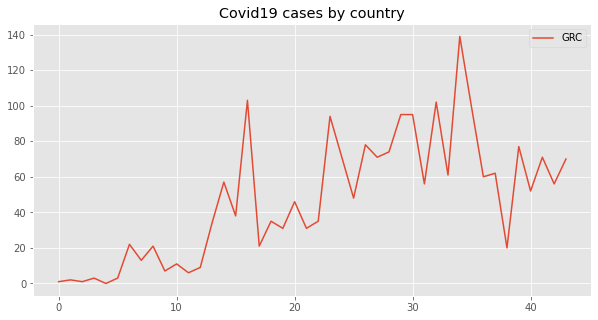

In [31]:
# plot to inspect
plot_countries(['GRC'], daily, t0, 'n/a')

In [ ]:
code = 'GBR'
start = t0[code]
print(daily[code])
print(daily[code][start:])

In [ ]:
code = 'SWE'
start = t0[code]
print(daily[code])
print(daily[code][start:])

In [ ]:
code = 'CHE'
start = t0[code]
print(daily[code])
print(daily[code][start:])

In [ ]:
# China has two thresholds so we manually set...
#daily['CHN'] = daily['CHN'][:67]

In [ ]:
countries_to_plot = ['CHN','GRC','ITA','CHE','NLD','DEU','FRA','ESP','GBR','USA']
plot_countries(countries_to_plot, daily, t0, 'Total_10.png')

In [ ]:
countries_to_plot = ['CHN','GRC','ITA','CHE','NLD','DEU','FRA','ESP','GBR','USA']
plot_countries_by_popul(countries_to_plot, daily, t0, 'Total_scale_10.png', pops)

In [ ]:
def daily_fit(t,t1,dt,dn):
    a=0.25
    t2=t1+dt
    return dn*(1./(1.+np.exp(-a*(t-t1))) - 1./(1.+np.exp(-a*(t-t2))))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# 
# Fit and print country=code data and parapmeters
#

def fit_and_print(code, daily, thresh, pops_array):
    popul=pops_array[code]  # popul=popul_ESP
    fdat = daily[code][thresh[code]:]  #fdat = daily_ESP
    xdat = np.arange(len(fdat))

    popt, pcov = curve_fit(daily_fit, xdat, fdat)
    print(popt)
    t1=popt[0]
    dt=popt[1]
    dn=popt[2]

    #a1= 0.25    
    #a2= 0.25  
    #t1= 25      
    #dt= 13     
    #dn= 13000

    ffit=daily_fit(xdat, t1, dt, dn)

    rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
    print(rmsfit/dn*100)

    cumm_dat=np.zeros(len(fdat))
    cumm_fit=np.zeros(len(fdat))
    cumm_dat[0]=fdat[0]
    cumm_fit[0]=ffit[0]
    for i in range (1,len(fdat)):
        cumm_dat[i]=cumm_dat[i-1]+fdat[i]
        cumm_fit[i]=cumm_fit[i-1]+ffit[i]

    fig=plt.figure(figsize=(15,5))
    plt.scatter(xdat,fdat)
    plt.plot(xdat,ffit,'g')
    # plt.title('ESP: 4/8/2020')
    plt.title(f'{code}: 4/8/2020')
    plt.ylabel('Daily cases')
    plt.xlabel('$t-t_0$ (days)')
    plt.show();
    #fig.savefig('Daily_ESP.png',format='png')
    filename = f'Daily_{code}.png'
    fig.savefig(filename,format='png')

    T_ext=30
    cumm_dat=np.zeros(len(fdat))
    xdat_ext = np.arange(len(fdat)+T_ext)
    ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
    cumm_fit=np.zeros(len(fdat)+T_ext)
    cumm_dat[0]=fdat[0]
    cumm_fit[0]=ffit[0]
    for i in range (1,len(fdat)):
        cumm_dat[i]=cumm_dat[i-1]+fdat[i]
    for i in range (1,len(fdat)+T_ext):
        cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

    fig=plt.figure(figsize=(15,5))
    plt.scatter(xdat,cumm_dat)
    plt.plot(xdat_ext,cumm_fit,'g')
    plt.title(f'{code}: 4/8/2020') # plt.title('ESP: 4/8/2020')
    plt.ylabel('Total cases')
    plt.xlabel('$t-t_0$ (days)')
    plt.show();
    filename = f'Total_{code}.png'
    fig.savefig(filename,format='png')
    #fig.savefig('Total_ESP.png',format='png')

    print(cumm_fit[-1])

#### For each country code

In [ ]:
fit_and_print('GRC', daily, t0, pops)

In [ ]:
fit_and_print('ESP', daily, t0, pops)

In [ ]:
# # ESP data and parapmeters
# popul=popul_ESP
# fdat = daily_ESP
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# #a1= 0.25    
# #a2= 0.25  
# #t1= 25      
# #dt= 13     
# #dn= 13000

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# cumm_dat=np.zeros(len(fdat))
# cumm_fit=np.zeros(len(fdat))
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
#     cumm_fit[i]=cumm_fit[i-1]+ffit[i]
    
# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('ESP: 4/8/2020')
# plt.ylabel('Daily cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Daily_ESP.png',format='png')

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('ESP: 4/8/2020')
# plt.ylabel('Total cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Total_ESP.png',format='png')

# print(cumm_fit[-1])

In [ ]:
fit_and_print('ITA', daily, t0, pops)

In [ ]:
# # ITA data and parapmeters

# fdat = daily_ITA
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# #a1= 0.25    
# #a2= 0.25    
# #t1= 20      
# #dt= 25      
# #dn= 6000    

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('ITA: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('ITA: 4/8/2020')
# plt.show();
# print(cumm_fit[-1])

In [ ]:
fit_and_print('NLD', daily, t0, pops)

In [ ]:
# # NDL data and parapmeters

# fdat = daily_NLD
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2] 

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('NLD: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('NLD: 4/8/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
fit_and_print('DEU', daily, t0, pops)

In [ ]:
# DEU data and parapmeters

# fdat = daily_DEU
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('DEU: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('DEU: 4/8/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
fit_and_print('FRA', daily, t0, pops)

In [ ]:
# FRA data and parapmeters

# fdat = daily_FRA
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)

# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('FRA: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('FRA: 4/8/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
fit_and_print('GRC', daily, t0, pops)

In [ ]:
# GRC data and parapmeters

# fdat = daily_GRC
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('GRC: 4/8/2020')
# plt.ylabel('Daily cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Daily_GRC.png',format='png')


# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('GRC: 4/8/2020')
# plt.ylabel('Total cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Total_GRC.png',format='png')


# print(cumm_fit[-1])

In [ ]:
fit_and_print('CHN', daily, t0, pops)

In [ ]:
# # CHN data and parapmeters

# fdat = daily_CHN
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('CHN: 4/8/2020')
# plt.ylabel('Daily cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Daily_CHN.png',format='png')


# T_ext=10
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('CHN: 4/8/2020')
# plt.ylabel('Total cases')
# plt.xlabel('$t-t_0$ (days)')
# #plt.legend()
# plt.show();
# fig.savefig('Total_CHN.png',format='png')


# print(cumm_fit[-1])

In [ ]:
# # USA data and parapmeters

# fdat = daily_USA
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# dt=22

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('USA: 4/8/2020')
# plt.ylabel('Daily cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.show();
# fig.savefig('Daily_USA.png',format='png')


# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
# fig=plt.figure(figsize=(10,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.ylabel('Total cases')
# plt.xlabel('$t-t_0$ (days)')
# plt.title('USA: 4/8/2020')
# plt.show();
# fig.savefig('Total_USA.png',format='png')


# print(cumm_fit[-1])

In [ ]:
def daily_fit(t,t1,dt,dn):
    a=0.25
    t2=t1+dt
    return dn*(1./(1.+np.exp(-a*(t-t1))) - 1./(1.+np.exp(-a*(t-t2))))

fit_and_print('GBR', daily, t0, pops)

In [ ]:
# CHN data and parapmeters

# def daily_fit(t,t1,dt,dn):
#     a=0.25
#     t2=t1+dt
#     return dn*(1./(1.+np.exp(-a*(t-t1))) - 1./(1.+np.exp(-a*(t-t2))))

# fdat = daily_GBR
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# #t1 = 28
# #dt = 20

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('GBR: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('GBR: 4/1/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
# # CHN data and parapmeters

# fdat = daily_SWE
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# dt = 60

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('SWE: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('SWE: 4/1/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
# # CHN data and parapmeters

# fdat = daily_CHE
# xdat = np.arange(len(fdat))
    
# popt, pcov = curve_fit(daily_fit, xdat, fdat)
# print(popt)
# t1=popt[0]
# dt=popt[1]
# dn=popt[2]

# #dt=23

# ffit=daily_fit(xdat, t1, dt, dn)

# rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
# print(rmsfit/dn*100)

# plt.figure(figsize=(15,5))
# plt.scatter(xdat,fdat)
# plt.plot(xdat,ffit,'g')
# plt.title('CHE: 4/8/2020')
# plt.show();

# T_ext=30
# cumm_dat=np.zeros(len(fdat))
# xdat_ext = np.arange(len(fdat)+T_ext)
# ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
# cumm_fit=np.zeros(len(fdat)+T_ext)
# cumm_dat[0]=fdat[0]
# cumm_fit[0]=ffit[0]
# for i in range (1,len(fdat)):
#     cumm_dat[i]=cumm_dat[i-1]+fdat[i]
# for i in range (1,len(fdat)+T_ext):
#     cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
# plt.figure(figsize=(15,5))
# plt.scatter(xdat,cumm_dat)
# plt.plot(xdat_ext,cumm_fit,'g')
# plt.title('CHE: 4/1/2020')
# plt.show();

# print(cumm_fit[-1])

In [ ]:
t1_ten=np.zeros(10)
x=np.arange(10)
t1_ten[7]=27.7
t1_ten[2]=21.4
t1_ten[4]=23.5
t1_ten[5]=24.5
t1_ten[6]=27.1
t1_ten[1]=17.0
t1_ten[0]=18.5
t1_ten[9]=28.6
t1_ten[8]=31.5
t1_ten[3]=22.4

fig=plt.figure(figsize=(6,5))
plt.plot(x[0],t1_ten[0],'o',label='CHN')
plt.plot(x[1],t1_ten[1],'o',label='GRC')
plt.plot(x[2],t1_ten[2],'o',label='ITA')
plt.plot(x[3],t1_ten[3],'o',label='CHE')
plt.plot(x[4],t1_ten[4],'o',label='NLD')
plt.plot(x[5],t1_ten[5],'o',label='DEU')
plt.plot(x[6],t1_ten[6],'o',label='FRA')
plt.plot(x[7],t1_ten[7],'o',label='ESP')
plt.plot(x[8],t1_ten[8],'o',label='GBR')
plt.plot(x[9],t1_ten[9],'o',label='USA')
plt.xlabel('Country index')
plt.ylabel('$t_1$ (days)')
plt.ylim(0,35)
plt.xlim(-1,12)
plt.legend()
plt.show()
fig.savefig('t1_10.png',format='png')


In [ ]:
Nt_ten=np.zeros(10)
x=np.arange(10)
Nt_ten[0]=81054
Nt_ten[1]=2210
Nt_ten[2]=150900
Nt_ten[3]=25424
Nt_ten[4]=25150
Nt_ten[5]=128900
Nt_ten[6]=93100
Nt_ten[7]=163750
Nt_ten[8]=81440
Nt_ten[9]=802000

fig=plt.figure(figsize=(6,5))
plt.plot(x[0],Nt_ten[0]/pops['CHN']*1.0e6,'o',label='CHN')
plt.plot(x[1],Nt_ten[1]/pops['GRC']*1.0e6,'o',label='GRC')
plt.plot(x[2],Nt_ten[2]/pops['ITA']*1.0e6,'o',label='ITA')
plt.plot(x[3],Nt_ten[3]/pops['CHE']*1.0e6,'o',label='CHE')
plt.plot(x[4],Nt_ten[4]/pops['NLD']*1.0e6,'o',label='NLD')
plt.plot(x[5],Nt_ten[5]/pops['DEU']*1.0e6,'o',label='DEU')
plt.plot(x[6],Nt_ten[6]/pops['FRA']*1.0e6,'o',label='FRA')
plt.plot(x[7],Nt_ten[7]/pops['ESP']*1.0e6,'o',label='ESP')
plt.plot(x[8],Nt_ten[8]/pops['GBR']*1.0e6,'o',label='GBR')
plt.plot(x[9],Nt_ten[9]/pops['USA']*1.0e6,'o',label='USA')
plt.ylim(0,4000)
plt.xlim(-1,12)
plt.xlabel('Country index')
plt.ylabel('Total cases per million')
plt.legend()
plt.show()
fig.savefig('Nt_10.png',format='png')

In [ ]:
Nt_ten=np.zeros(10)
x=np.arange(10)
Nt_ten[0]=81054
Nt_ten[1]=2210
Nt_ten[2]=150900
Nt_ten[3]=25424
Nt_ten[4]=25150
Nt_ten[5]=128900
Nt_ten[6]=93100
Nt_ten[7]=163750
Nt_ten[8]=81440
Nt_ten[9]=802000

fig=plt.figure(figsize=(6,5))
plt.plot(x[0],Nt_ten[0]/pops['CHN']*1.0e6,'o',label='CHN')
plt.plot(x[1],Nt_ten[1]/pops['GRC']*1.0e6,'o',label='GRC')
plt.plot(x[2],Nt_ten[2]/pops['ITA']*1.0e6,'o',label='ITA')
plt.plot(x[3],Nt_ten[3]/pops['CHE']*1.0e6,'o',label='CHE')
plt.plot(x[4],Nt_ten[4]/pops['NLD']*1.0e6,'o',label='NLD')
plt.plot(x[5],Nt_ten[5]/pops['DEU']*1.0e6,'o',label='DEU')
plt.plot(x[6],Nt_ten[6]/pops['FRA']*1.0e6,'o',label='FRA')
plt.plot(x[7],Nt_ten[7]/pops['ESP']*1.0e6,'o',label='ESP')
plt.plot(x[8],Nt_ten[8]/pops['GBR']*1.0e6,'o',label='GBR')
plt.plot(x[9],Nt_ten[9]/pops['USA']*1.0e6,'o',label='USA')
plt.ylim(0,4000)
plt.xlim(-1,12)
plt.xlabel('Country index')
plt.ylabel('Total cases per million')
plt.legend()
plt.show()
fig.savefig('Nt_10.png',format='png')